In [3]:
import os
import struct
import numpy as np

In [4]:
def load_mnist(path, kind = 'train'):
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype = np.uint8)
    
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype = np.uint8).reshape(
            len(labels), 784)
        images = ((images / 255.) - .5) * 2
    
    return images, labels

In [5]:
X_train, y_train = load_mnist('', kind = 'train')
print('rows: %d, cols: %d' %(X_train.shape[0], X_train.shape[1]))

rows: 60000, cols: 784


In [6]:
X_test, y_test = load_mnist('', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


## Visualize images

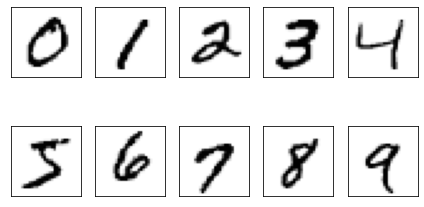

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=5,
                       sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

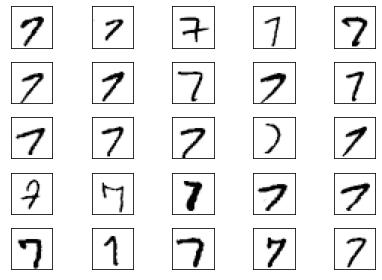

In [11]:
fig, ax = plt.subplots(nrows=5,ncols=5,
                       sharex=True,
                       sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()